In [120]:
from  sklearn.metrics  import  accuracy_score
# import train_test_split
from  sklearn.model_selection  import  train_test_split
import pandas  as  pd
import numpy  as  np
import csv

In [121]:
# load data from csv file
df  =  pd.read_csv( 'train.csv' )
# convert all string labels to codes
categories_list = df[ 'category' ].astype( 'category' ).cat.categories
df[ 'category' ] = df[ 'category' ].astype('category').cat.codes
# store category codes in y

# count number of occurences of each category
counts = df[ 'category' ].value_counts()
# store category names in a list
categories = counts.index.tolist()
# store category counts in a list
counts = counts.tolist()
print(categories)
print(counts)

data = np.array(df.values)

# drop first column
data = data[:,1:]
print(data.shape)

# split the data into X and y
X = data[:,:-1]
y = data[:,-1]
data = X
print(data.shape)

[3, 1, 0, 15, 19, 10, 18, 2, 5, 16, 17, 7, 9, 4, 13, 14, 12, 11, 6, 8]
[86, 81, 78, 77, 75, 72, 65, 63, 58, 58, 57, 56, 55, 54, 54, 51, 48, 46, 45, 37]
(1216, 4097)
(1216, 4096)


In [122]:
# remove linearly dependent columns using qr decomposition
# Q, R = np.linalg.qr(data)
# data = Q[:, np.abs(np.diag(R)) > 1e-10]

# print(data.shape)
# print(X.shape)


In [123]:
# delete the outliers that have md < 800 from the data
# convert the first column to integers
# np_outliers[:,0] = np_outliers[:,0].astype(int)
# out = np_outliers[np_outliers[:,1] < 800, 0]
# out = out.astype(int)
# data_clean = np.delete(data, out, axis=0)
# y_clean = np.delete(y, out, axis=0)
# print(data_clean.shape)
# print(y_clean.shape)
# print(data.shape)
# print(y.shape)

In [124]:
# train a neural network on this data
# split data into training and testing
# get X_new_train
X_df = pd.read_csv('train.csv')
X_new_train = X_df.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [125]:
# standardize the data
from  sklearn.preprocessing  import  StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [126]:
# do pca on the data
# from sklearn.decomposition import PCA
# pca = PCA(n_components=800)
# pca.fit(X_train)
# X_train = pca.transform(X_train)
# print(X_train.shape)

# X_test = pca.transform(X_test)

In [127]:
# run lda on this
# from  sklearn.discriminant_analysis  import  LinearDiscriminantAnalysis
# lda = LinearDiscriminantAnalysis(n_components=19)
# lda.fit(X_train, y_train)

# X_train_lda = lda.transform(X_train)
# X_test_lda = lda.transform(X_test)

In [128]:
# # run logistic regression on this data
# from  sklearn.linear_model  import  LogisticRegression
# logisticRegr = LogisticRegression()
# logisticRegr.fit(X_train, y_train)

# # predict on test data
# predictions = logisticRegr.predict(X_test)

# # print accuracy
# print(accuracy_score(y_test, predictions))

# run LR on lda data
# logisticRegr = LogisticRegression()
# logisticRegr.fit(X_train_lda, y_train)

# # predict on test data
# predictions = logisticRegr.predict(X_test_lda)

# # print accuracy
# print(accuracy_score(y_test, predictions))

In [129]:
# import neural network
from  sklearn.neural_network  import  MLPClassifier

# create a neural network with adam, 1e-5, 284, 52, 42, 10000
# run a for loop, increasing the number of hidden layers by 1 in each iteration
# for i in range(45, 65):
#     print("\t" + str(i), end="")
# print()
# for j in range(280, 300):
#     print(str(j) + "\t", end="")
#     for i in range(45, 65):
#         clf = MLPClassifier(solver='adam' , alpha=1e-5, hidden_layer_sizes=(j, i), random_state=42, max_iter=10000)
#         clf.fit(X_train, y_train)
#         y_pred = clf.predict(X_test)
#         print(str(round(accuracy_score(y_test, y_pred)*1216*0.2)), end="\t")
#     print()

# create a neural network
for i in range(1, 5):
    # clf = MLPClassifier(solver='adam' , alpha=1e-5, random_state=i, max_iter=10000, hidden_layer_sizes=(300, 60))
    # clf = MLPClassifier(solver='lbfgs' , alpha=1e-5, random_state=i, max_iter=10000, hidden_layer_sizes=(300, 59))
    clf = MLPClassifier(solver='adam' , alpha=1e-5, random_state=i, max_iter=10000, hidden_layer_sizes=(448, 119, 170, 116))
    clf.fit(X_train, y_train)

    # predict on test data
    y_pred = clf.predict(X_test)

    # print accuracy
    print(accuracy_score(y_test, y_pred))

# # do k fold cross validation
# from  sklearn.model_selection  import  cross_val_score
# scores = cross_val_score(clf, X_train, y_train, cv=5)
# print(scores)
# print(scores.mean())

# do grid search
# from  sklearn.model_selection  import  GridSearchCV

# # define the parameter values that should be searched
# alpha_range = [1e-5]
# hidden_layer_sizes = []
# for i in range(106, 120, 1):
#     # for j in range(50, 100, 10):
#     #     for k in range(50, 100, 10):
#     #         for l in range(50, 100, 10):
#                 hidden_layer_sizes += [(448, 119, 170, i)]

# # create a parameter grid: map the parameter names to the values that should be searched
# param_grid = dict(alpha=alpha_range, hidden_layer_sizes=hidden_layer_sizes)
# # instantiate the grid
# grid = GridSearchCV(clf, param_grid, cv=4, scoring='accuracy', verbose=2, n_jobs=4)

# # fit the grid with data
# grid.fit(X_train, y_train)

# # # view the complete results (list of named tuples)
# grid.cv_results_


0.7745901639344263
0.7704918032786885
0.7745901639344263
0.7622950819672131


In [130]:
print(grid.best_score_)
print(grid.best_params_)

0.7510288065843622
{'alpha': 1e-05, 'hidden_layer_sizes': (448, 119, 170, 116)}


| Layer 1 | Layer 2 | Accuracy | Random State
| --------- | -------- | ----------- | --- |
| 300 | 25 | 0.72something | 1 |
| 300 | 30 | 0.7336 | 1 |
| 300 | 40 | 0.7377 | 1 |
| 300 | 50 | 0.7418 | 1 |
| 300 | 53 | 0.75 |   1 |
| 300 | 52 | 0.7663 | 1 |
| 300 | 52 | 0.7746 | 42 |
| 320 | 52 | 0.7828 | 42 |
| 280 | 52 | 0.7868 | 42 |

284 first layer
- Accuracy for 47 hidden layers is 0.7295081967213115
- Accuracy for 48 hidden layers is 0.7377049180327869
- Accuracy for 49 hidden layers is 0.7418032786885246
- Accuracy for 50 hidden layers is 0.7336065573770492
- Accuracy for 51 hidden layers is 0.7418032786885246
- Accuracy for 52 hidden layers is 0.7459016393442623
- Accuracy for 53 hidden layers is 0.7418032786885246
- Accuracy for 54 hidden layers is 0.7377049180327869
- Accuracy for 55 hidden layers is 0.7459016393442623
- Accuracy for 56 hidden layers is 0.7581967213114754
- Accuracy for 57 hidden layers is 0.7459016393442623
- Accuracy for 58 hidden layers is 0.7336065573770492
- Accuracy for 59 hidden layers is 0.7581967213114754
- Accuracy for 60 hidden layers is 0.7581967213114754
- Accuracy for 61 hidden layers is 0.75
- Accuracy for 62 hidden layers is 0.75

In [133]:
# run pca on X
# from  sklearn.decomposition  import  PCA
# pca2 = PCA(n_components=800)
# pca2.fit(data)

# # transform X
# data = pca2.transform(data)

# train on the whole data

# standardize the whole data
scaler = StandardScaler()
scaler.fit(data)

data = scaler.transform(data)

clf.fit(data, y)

# find training accuracy
y_pred = clf.predict(data)
print(accuracy_score(y, y_pred))


# load test data
df_test = pd.read_csv( 'test.csv' )
data_test = np.array(df_test.values)
data_test = data_test[:,1:]
print(data_test.shape)

# standardize the test data
data_test = scaler.transform(data_test)

# do pca on the test data
# data_test = pca2.transform(data_test)

# run neural network on test data
y_pred = clf.predict(data_test)

# change the labels to the original labels
y_pred = y_pred.astype(int)
y_pred = categories_list[y_pred]

# write the predictions to a csv file
with open( 'nn_wo_pca_4_layer.csv' ,  'w' , newline='')  as  csvfile:
    writer = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    writer.writerow([ 'ID' ,  'Category' ])
    for i in range(len(y_pred)):
        writer.writerow([i, y_pred[i]])

1.0
(415, 4096)


In [132]:
# implement mahalanobis distance to find outliers
def mahalanobis(x, data):
    # calculate mean of data
    mean = np.mean(data, axis=0)
    # calculate covariance matrix of data
    cov = np.cov(data, rowvar=False)
    # calculate inverse of covariance matrix
    print(cov)
    cov_inv = np.linalg.inv(cov)
    # calculate mahalanobis distance
    left_term = np.dot(np.transpose(x-mean), cov_inv)
    mahal = np.dot(left_term, (x-mean))
    return  mahal

# find outliers
outliers = []
for i in range(len(data)):
    print( 'Processing data point ' , i)
    # calculate mahalanobis distance
    md = mahalanobis(data[i], data)
    # if mahalanobis distance is greater than 3.84, then it is an outlier
    # if md > 3.84:
    outliers.append([i, md])

    
# remove outliers
# data = np.delete(data, outliers, axis=0)

print( 'Number of outliers: ' , len(outliers))
print("Outliers: ", outliers)


Processing data point  0
[[ 3.54190310e-04  4.06669677e-04  1.97612143e-04 ...  1.82626831e-04
   1.02433283e-04 -3.45326753e-04]
 [ 4.06669677e-04  2.88983407e-02  3.15777321e-03 ...  1.33367945e-04
   7.23421085e-04 -1.33989183e-02]
 [ 1.97612143e-04  3.15777321e-03  4.75988747e-02 ...  8.12342290e-04
  -6.03434312e-04 -3.64911814e-03]
 ...
 [ 1.82626831e-04  1.33367945e-04  8.12342290e-04 ...  8.37172868e-04
   2.06283263e-05 -8.91369534e-04]
 [ 1.02433283e-04  7.23421085e-04 -6.03434312e-04 ...  2.06283263e-05
   1.06420296e-02  2.32269003e-03]
 [-3.45326753e-04 -1.33989183e-02 -3.64911814e-03 ... -8.91369534e-04
   2.32269003e-03  4.96639698e-02]]


LinAlgError: Singular matrix

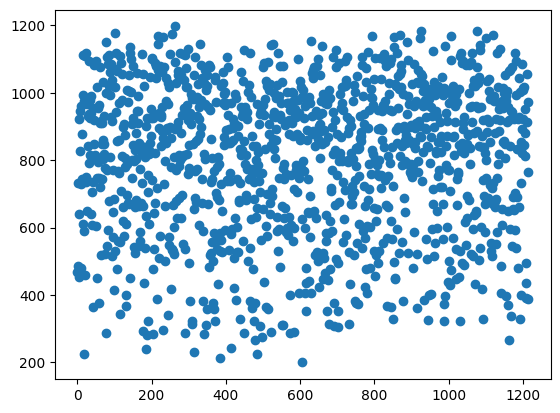

In [ ]:
# plot the outliers array on 1D graph
import matplotlib.pyplot  as  plt
np_outliers = np.array(outliers)
plt.scatter(np_outliers[:,0], np_outliers[:,1])
plt.show()